<a href="https://colab.research.google.com/github/NusRAT-LiA/Neural-Network/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Define A Simple Neural Network**

*This Python script defines and demonstrates a simple feedforward neural network using PyTorch. The network, named **SimpleNN**, consists of an input layer with 2 features, a hidden layer with 3 neurons, and an output layer with 1 neuron. It uses the ReLU activation function between layers. After defining the network, the script creates an instance of it, feeds a sample input tensor, and prints the resulting output.*

In [1]:

import torch
import torch.nn as nn

# Define a simple neural network with one hidden layer
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(2, 3)  # Input layer (2 features) to hidden layer (3 neurons)
        self.relu = nn.ReLU()          # Activation function (ReLU)
        self.layer2 = nn.Linear(3, 1)  # Hidden layer (3 neurons) to output layer (1 output)


    def forward(self, x):
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        return x

# Create an instance of the neural network
model = SimpleNN()

# Sample input
input_data = torch.tensor([[1.0, 2.0]])
output = model(input_data)
print("Network output:\n", output)


Network output:
 tensor([[-0.5664]], grad_fn=<AddmmBackward0>)


**Training a Neural Network: Loss Calculation, Backpropagation, and Weight Updates in PyTorch**


---


**Define Loss Function:**
The nn.MSELoss() function is defined as the loss function. It calculates the Mean Squared Error (MSE) between the model's predicted output (output) and the target output (target).

**Define Optimizer:**
The torch.optim.SGD optimizer is set up for the model's parameters with a learning rate of 0.01. The optimizer is responsible for updating the model weights during training.

**Specify Target Output:**
A sample target output tensor (target) is defined with a value of [[0.0]]. This represents the desired output for the given input.

**Compute Loss:**
The loss between the model's output (output) and the target (target) is calculated using the defined loss function. The loss value is printed.

**Backpropagation:**
The gradients of the loss with respect to the model's parameters are computed using loss.backward().
Before computing gradients, optimizer.zero_grad() is called to clear any existing gradients stored in the parameters (from previous iterations).

**Update Weights:**
The optimizer updates the model's parameters using the computed gradients by calling optimizer.step().

In [2]:
# Define loss function (Mean Squared Error)
loss_fn = nn.MSELoss()

# Define optimizer (Stochastic Gradient Descent)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Sample target output
target = torch.tensor([[0.0]])

# Compute loss
loss = loss_fn(output, target)
print("Loss:", loss.item())

# Backpropagation: compute gradients
optimizer.zero_grad()
loss.backward()

# Update weights
optimizer.step()

print("Updated model parameters:")
for param in model.parameters():
    print(param)


Loss: 0.3207804560661316
Updated model parameters:
Parameter containing:
tensor([[-0.5719, -0.1832],
        [-0.2534, -0.6493],
        [ 0.2647, -0.4960]], requires_grad=True)
Parameter containing:
tensor([-0.4325,  0.4636, -0.3288], requires_grad=True)
Parameter containing:
tensor([[ 0.1210, -0.1043, -0.0858]], requires_grad=True)
Parameter containing:
tensor([-0.5550], requires_grad=True)


**Setting Up Mini-Batch Processing**

This section is used to prepare data for training your neural network efficiently. The DataLoader handles batching and randomization, simplifying the process of iterating over the dataset in the training loop.

**Creating a Dataset:**

TensorDataset(inputs, targets) combines the inputs and targets into a dataset object that can be accessed as (input, target) pairs.



**DataLoader(dataset, batch_size=2, shuffle=True):**

Splits the dataset into mini-batches of size 2.

Shuffles the dataset to randomize the order of the samples during each epoch, which improves training.

In [8]:
from torch.utils.data import DataLoader, TensorDataset


# Generate synthetic dataset
inputs = torch.tensor([[1.0, 2.0], [2.0, 3.0], [3.0, 4.0], [4.0, 5.0], [5.0, 6.0]])
targets = torch.tensor([[0.0], [1.0], [2.0], [3.0], [4.0]])

# Create a DataLoader for mini-batch training
dataset = TensorDataset(inputs, targets)
dataloader = DataLoader(dataset, batch_size=2, shuffle=True)


In [9]:
# Initialize the model, loss function, and optimizer
model = SimpleNN()
loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# Track losses for visualization
training_losses = []

This section trains the neural network over 20 epochs, performing forward and backward passes for each mini-batch. It computes the loss, updates the model's weights using backpropagation, and tracks the average loss for each epoch for later visualization.

In [10]:
epochs = 20
for epoch in range(epochs):
    epoch_loss = 0.0
    for batch_inputs, batch_targets in dataloader:
        # Forward pass
        predictions = model(batch_inputs)
        loss = loss_fn(predictions, batch_targets)

        # Backward pass and weight update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Accumulate loss for visualization
        epoch_loss += loss.item()

    # Record average loss for the epoch
    training_losses.append(epoch_loss / len(dataloader))
    print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss / len(dataloader):.4f}")


Epoch 1/20, Loss: 9.0507
Epoch 2/20, Loss: 3.6679
Epoch 3/20, Loss: 1.2966
Epoch 4/20, Loss: 0.3375
Epoch 5/20, Loss: 0.3368
Epoch 6/20, Loss: 0.3046
Epoch 7/20, Loss: 0.3006
Epoch 8/20, Loss: 0.2445
Epoch 9/20, Loss: 0.3008
Epoch 10/20, Loss: 0.3838
Epoch 11/20, Loss: 0.1738
Epoch 12/20, Loss: 0.2576
Epoch 13/20, Loss: 0.1935
Epoch 14/20, Loss: 0.1626
Epoch 15/20, Loss: 0.2039
Epoch 16/20, Loss: 0.2331
Epoch 17/20, Loss: 0.1989
Epoch 18/20, Loss: 0.2923
Epoch 19/20, Loss: 0.1859
Epoch 20/20, Loss: 0.2296


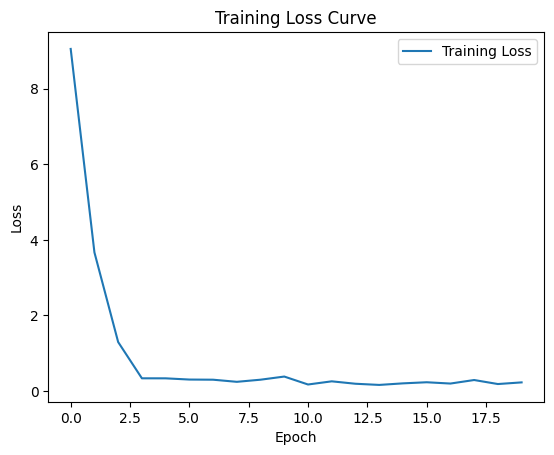

In [12]:
import matplotlib.pyplot as plt

# Visualization 1: Loss Curve
plt.plot(training_losses, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.legend()
plt.show()

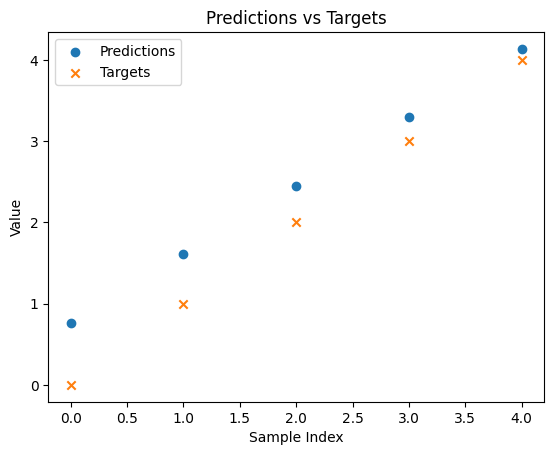

In [13]:

# Visualization 2: Predictions vs Targets
model.eval()
with torch.no_grad():
    predictions = model(inputs).numpy()
    targets_np = targets.numpy()

plt.scatter(range(len(predictions)), predictions, label="Predictions")
plt.scatter(range(len(targets_np)), targets_np, label="Targets", marker='x')
plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("Predictions vs Targets")
plt.legend()
plt.show()

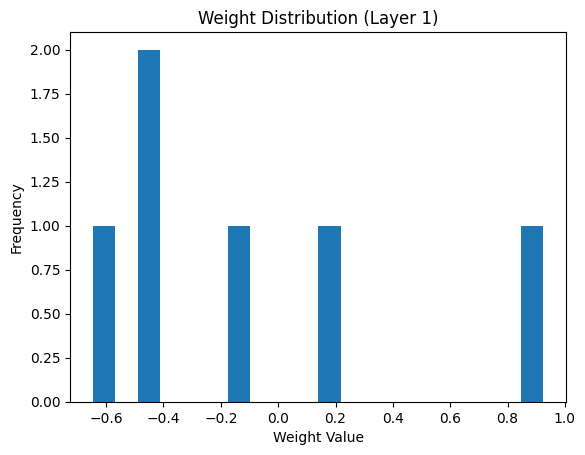

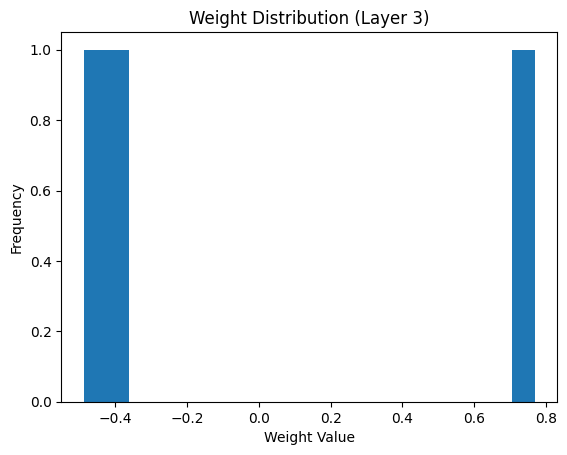

In [20]:
# Visualization :3 Weight Distribution for All Layers
for idx, layer in enumerate(model.children()):
    if isinstance(layer, nn.Linear):
        weights = layer.weight.data.numpy()
        plt.hist(weights.flatten(), bins=20)
        plt.xlabel("Weight Value")
        plt.ylabel("Frequency")
        plt.title(f"Weight Distribution (Layer {idx+1})")
        plt.show()